In [5]:
""" This is a countinuation of the loan default predtion model and this part is focues 
on  model builing, training , testing and evaluation
"""
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

In [6]:
# First importing the dataset 
eng_data = pd.read_parquet("loan_data_engineered.parquet")

In [7]:
eng_data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeBand,CreditScoreBand,DTIBand,EmploymentStability,LoanToIncomeRatio,HighRiskFlag
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,...,Other,1,0,41-60,Upper-Mid,Poor,Medium,5-10yrs,0.588262,1
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,...,Other,1,0,60+,Medium,Poor,High,1-5yrs,2.467481,1
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,...,Auto,0,1,41-60,Upper-Mid,Poor,Medium,1-5yrs,1.534154,1


In [8]:
eng_data["Default"].value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

  ## EXPLORATORY DATA ANALYSIS(EDA)

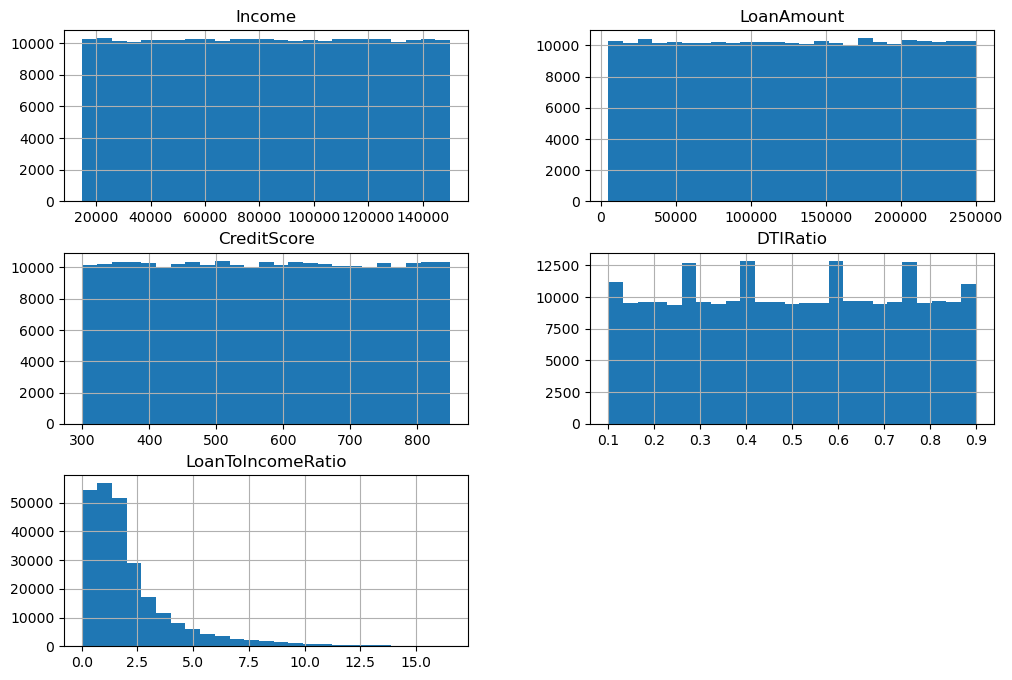

In [9]:
# Univariate analysis , distribution of numaric features 
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Income","LoanAmount","CreditScore","DTIRatio","LoanToIncomeRatio"]
eng_data[num_cols].hist(bins = 25, figsize=(12,8))
plt.show()

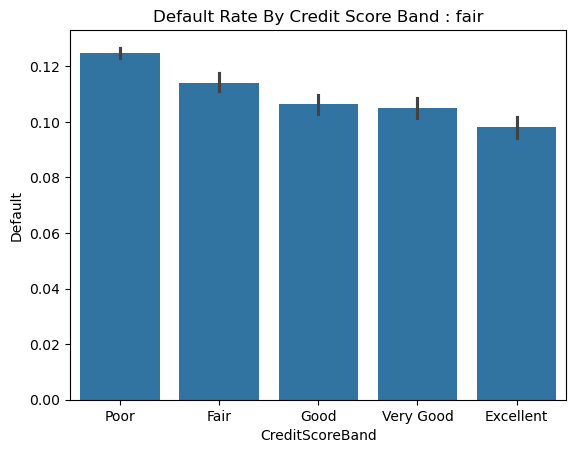

In [10]:
# Target vs features analysis and visualization, default rate by CreditScoreBand
sns.barplot(x = "CreditScoreBand", y = "Default",data = eng_data)
plt.title("Default Rate By Credit Score Band : fair")
plt.show()

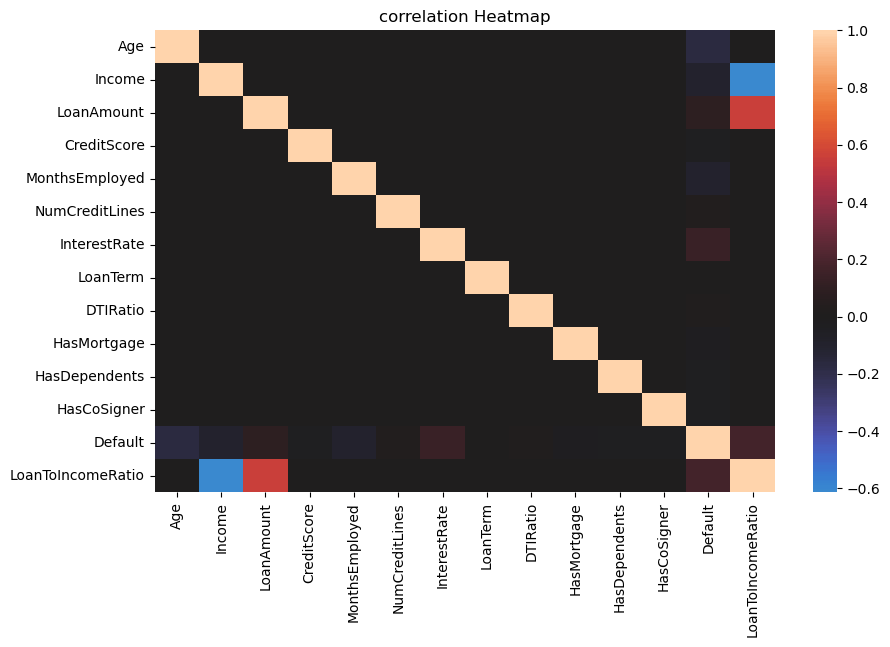

In [11]:
# Correlation heatmap
numeric_df = eng_data.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr,center = 0)
plt.title("correlation Heatmap")
plt.show()

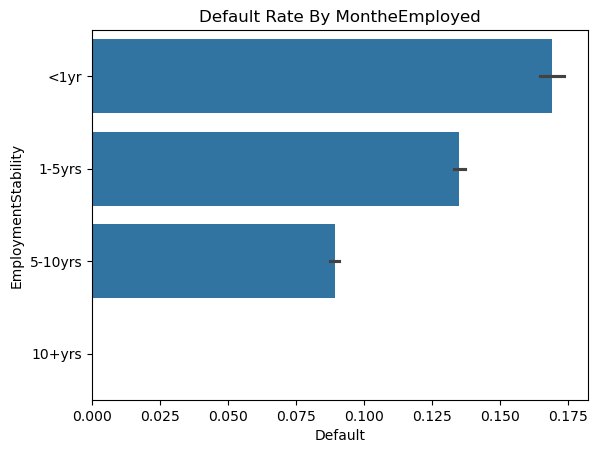

In [12]:
# Default rate by employment type 
sns.barplot(x = "Default", y = "EmploymentStability",data = eng_data)
#plt.figure(figsize=(10,6))
plt.title("Default Rate By MontheEmployed")
plt.show()

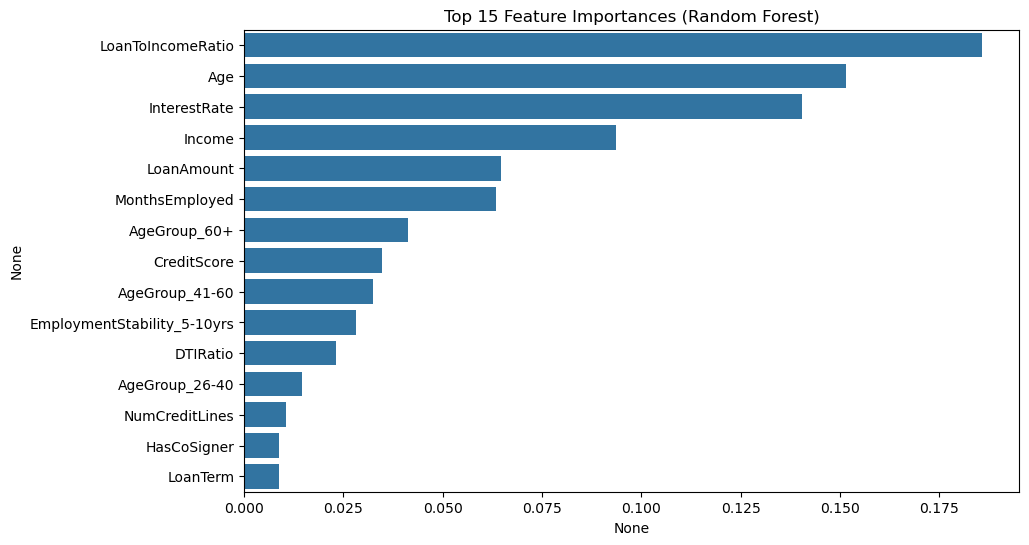

In [29]:
# Important features 
import pandas as pd

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

## MODEL BUILDING AND EVALUATION

In [13]:
eng_data_encoded = pd.get_dummies(eng_data, drop_first=True)

# Check the new dataframe
print(eng_data_encoded.head(3))
eng_data.head(2)

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   

   InterestRate  LoanTerm  DTIRatio  HasMortgage  ...  CreditScoreBand_Fair  \
0         15.23        36      0.44            1  ...                 False   
1          4.81        60      0.68            0  ...                 False   
2         21.17        24      0.31            1  ...                 False   

   CreditScoreBand_Good  CreditScoreBand_Very Good  CreditScoreBand_Excellent  \
0                 False                      False                      False   
1                 False                      False                      False   
2                 False                      False                      False   

   DTIBand_Medium  DTIBand_High  DTIBand_Extreme  Employm

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeBand,CreditScoreBand,DTIBand,EmploymentStability,LoanToIncomeRatio,HighRiskFlag
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,...,Other,1,0,41-60,Upper-Mid,Poor,Medium,5-10yrs,0.588262,1
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,...,Other,1,0,60+,Medium,Poor,High,1-5yrs,2.467481,1


In [23]:
# Train Test split
#X = eng_data.drop("Default", axis = 1)
#y = eng_data["Default"]

X = eng_data_encoded.drop("Default", axis=1)  # Features
y = eng_data_encoded["Default"]              # Target


X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, stratify = y , random_state= 42
)

X_train = X_train.astype("float32")
X_test  = X_test.astype("float32")

print('Optimize trained model')

Optimize trained model


In [28]:
print(X_train.columns.tolist())

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'LoanToIncomeRatio', 'HighRiskFlag', 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'AgeGroup_26-40', 'AgeGroup_41-60', 'AgeGroup_60+', 'IncomeBand_Medium', 'IncomeBand_Upper-Mid', 'IncomeBand_High', 'CreditScoreBand_Fair', 'CreditScoreBand_Good', 'CreditScoreBand_Very Good', 'CreditScoreBand_Excellent', 'DTIBand_Medium', 'DTIBand_High', 'DTIBand_Extreme', 'EmploymentStability_1-5yrs', 'EmploymentStability_5-10yrs', 'EmploymentStability_10+yrs']


In [24]:
print(eng_data_encoded.columns.tolist())

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default', 'LoanToIncomeRatio', 'HighRiskFlag', 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'AgeGroup_26-40', 'AgeGroup_41-60', 'AgeGroup_60+', 'IncomeBand_Medium', 'IncomeBand_Upper-Mid', 'IncomeBand_High', 'CreditScoreBand_Fair', 'CreditScoreBand_Good', 'CreditScoreBand_Very Good', 'CreditScoreBand_Excellent', 'DTIBand_Medium', 'DTIBand_High', 'DTIBand_Extreme', 'EmploymentStability_1-5yrs', 'EmploymentStability_5-10yrs', 'EmploymentStability_10+yrs']


In [17]:
# BASELINE MODEL (logistic REGRESSION)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.61      0.07      0.12      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.53     51070
weighted avg       0.86      0.89      0.84     51070



In [18]:
# code testing 
print(type(y_test), type(y_pred))
print(y_test[:10])
print(y_pred[:10])


<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
211648    0
201101    0
140423    0
204530    0
166481    0
239445    0
127976    0
124925    0
26516     1
82635     0
Name: Default, dtype: int64
[0 0 0 0 0 0 0 0 0 0]


In [25]:
# Model2 RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,max_depth = 10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.71      0.02      0.05      5931

    accuracy                           0.89     51070
   macro avg       0.80      0.51      0.49     51070
weighted avg       0.87      0.89      0.84     51070



In [26]:
# saving with joblib 
import joblib

# after training
joblib.dump(rf, "loan_model_me.pkl")
print('saving for the second time')


saving for the second time


In [25]:
import pickle

# Saving  trained model
with open("loan_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Random Forest model saved as loan_model.pkl")


✅ Random Forest model saved as loan_model.pkl


In [27]:
# Mode3 XGBooster
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))


ModuleNotFoundError: No module named 'xgboost'